<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/dz2_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Центральная предельная теорема. 

Как применить законы статистики к данным ? 
Сколько элементов сумм использовано в коде?

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

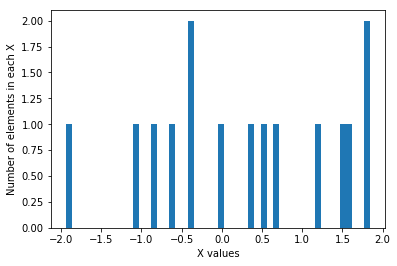

In [0]:
number_of_sums = 15
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

# Матрица ковариаций

Чему равна матрица ковариаций для графика?

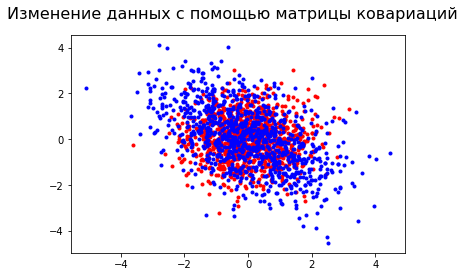

In [0]:
import numpy.linalg as la
n = 1000
C = [[2,-1],[-1,2]] # найти!
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

# Разброс данных 2 способами: теоритически и практически

Построить преобразование с помощью вычисленной выше матрицей

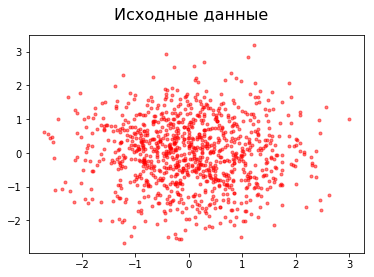

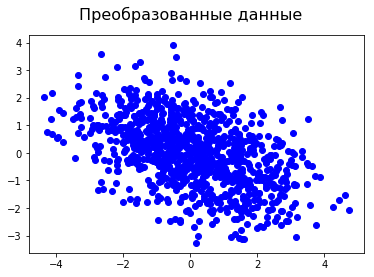

In [0]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = [[2,-1],[-1,2]]
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [0]:
import math
theta = (90+45)*3.14/180
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = u.T*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)


генерация данных:  2.8712107457120077
теоритический подсчет:  [[2.99999715]]


При  большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?

Посчитать как меняется вариация в зависимости от выбора собственного вектора

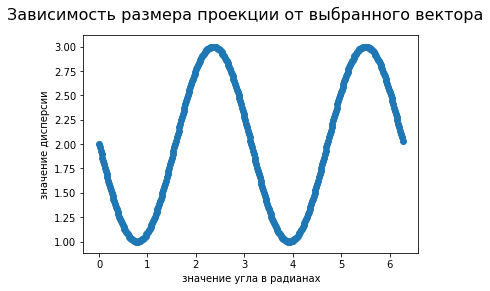

In [0]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

# Работа с данными данные

Загрузить таблицу. 

In [0]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
print(df.head(4))

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  


Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', '4225', '4770']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1         2
0 -0.999909 -0.994680 -0.999962
1 -0.999941 -0.995639 -0.999954
2 -0.999930 -0.989336 -0.999898
3 -0.999900 -0.992968 -0.999943
4 -0.999917 -0.995717 -0.999940


Как пример, корелляциям между 'Total Volume' и 'Total Bags'

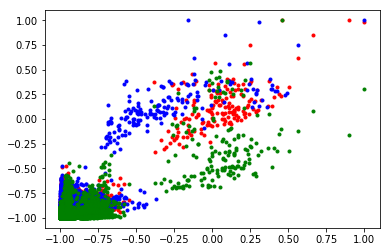

In [0]:
x_4046 = df_norm[0]
x_4225 = df_norm[1]
x_4770 = df_norm[2]
plt.plot(x_4046, x_4225, 'r.')
plt.plot(x_4770, x_4225, 'b.')
plt.plot(x_4046, x_4770, 'g.')

Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [0]:
df_norm.corr()

0         1         2
0  1.000000  0.926110  0.833389
1  0.926110  1.000000  0.887855
2  0.833389  0.887855  1.000000

In [0]:
w,v = la.eig(Cb)
print(w)
print(v)

[2.76544627 0.17115766 0.06339607]
[[-0.57634639 -0.6019748   0.55267638]
 [-0.58783414 -0.16442044 -0.79209654]
 [-0.56769345  0.78140403  0.25909821]]


# Поиск собственного вектора

Рассмотрим отдельный случай для 2-ух видов: x_4046 и x_4225

         0        1
0  1.00000  0.92611
1  0.92611  1.00000
1.9261099558992305 [0.70710678 0.70710678]


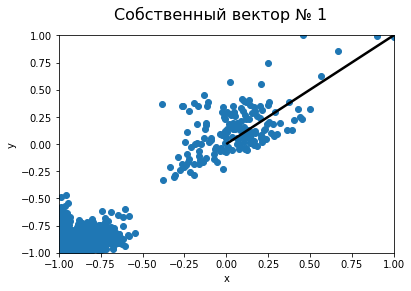

0.07389004410076949 [-0.70710678  0.70710678]


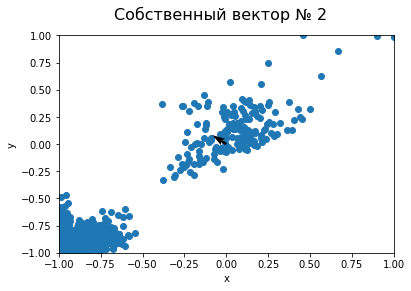

In [0]:
import numpy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
n=1000
Cb = df_norm[[0,1]].corr()
print(Cb)
w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.scatter(df_norm[0], df_norm[1])
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale=1.5/w[i], zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Линейное преобразование значений (проекция на ось).

На какую прямую проецируем?

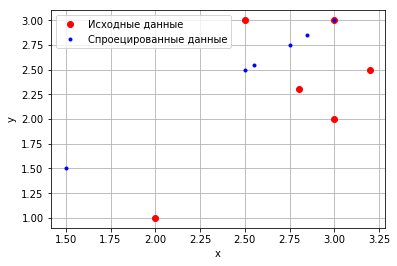

In [7]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
 # проецирование на какую прямую
P = [[.5,.5],[.5,.5]]
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
#plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

# Теория вероятности

Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram. 

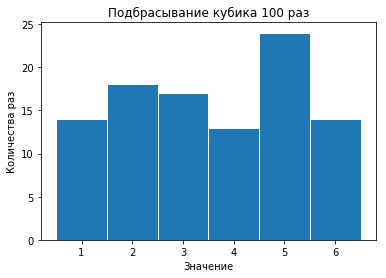

In [30]:
import pylab
import numpy

# Количество испытаний
trials = 100

# Массив значений
values = numpy.random.randint(1, 7, size=trials)
pylab.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')

pylab.xlabel('Значение')
pylab.ylabel('Количества раз')
pylab.title('Подбрасывание кубика ' + str(trials) + ' раз')
pylab.show()

Возьмем пример подбрасываний двух кубиков


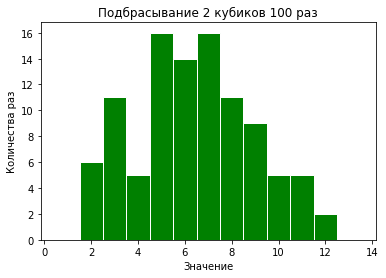

In [32]:
# Массив значений
values = []
for i in range(trials):
  values.append(numpy.random.randint(1, 7) + numpy.random.randint(1, 7))
pylab.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5], facecolor='green', edgecolor='white')
pylab.xlabel('Значение')
pylab.ylabel('Количества раз')
pylab.title('Подбрасывание 2 кубиков ' + str(trials) + ' раз')
pylab.show()